In [1]:
import pandas as pd
from newspaper import Article
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import nltk
import ast
# nltk.download('punkt')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
df = pd.read_csv('raw_kathmandu_post/tweets.csv', usecols=['id', 'created_at', 'tweet', 'urls'], parse_dates=['created_at'])

In [3]:
list(df)

['id', 'created_at', 'tweet', 'urls']

In [4]:
df.shape

(104850, 4)

In [5]:
df.head()

,id,created_at,tweet,urls
0,1384858205365411843,2021-04-21 19:00:00+05:45,Nepali politicians are losing their moral comp...,['http://tkpo.st/3txH6mG']
1,1384842930247057408,2021-04-21 17:59:18+05:45,"Nepal’s Covid-19 toll reaches 3,112 with 10 mo...",['https://tkpo.st/3syl55P']
2,1384835556098682880,2021-04-21 17:30:00+05:45,As many as 67 vultures found dead in Jitpur I...,['https://tkpo.st/3eqpPFU']
3,1384830522984222722,2021-04-21 17:10:00+05:45,EDITORIAL: Online classes for some The pandem...,['http://tkpo.st/3sBsVM9']
4,1384825924521140225,2021-04-21 16:51:43+05:45,Twitter becomes platform of hope amid the desp...,['https://tkpo.st/3xcw9cv']


In [6]:
df.tail()

,id,created_at,tweet,urls
104845,221099243107123201,2012-07-06 10:17:22+05:45,Integration of former combatants into Nepal Ar...,['http://fb.me/1MWLksOI5']
104846,221098935278772228,2012-07-06 10:16:08+05:45,Why make fuss of a confident PM after he hobno...,['http://fb.me/VKxnhs4N']
104847,221098156455247876,2012-07-06 10:13:02+05:45,The buzz over budget by Former Finance Ministe...,['http://fb.me/1Rwoo1bnG']
104848,221097419788664833,2012-07-06 10:10:07+05:45,Government plans to allocate Rs. 10 billion fo...,['http://fb.me/1JWfS9vGM']
104849,221095350692352000,2012-07-06 10:01:54+05:45,"Is it possible, CA reinstatement for 27 minute...",['http://fb.me/28ZaLyQv7']


In [7]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2012-12-31 00:00:00+05:45,399
2013-12-31 00:00:00+05:45,49
2014-12-31 00:00:00+05:45,7798
2015-12-31 00:00:00+05:45,13476
2016-12-31 00:00:00+05:45,18979
2017-12-31 00:00:00+05:45,21918
2018-12-31 00:00:00+05:45,17945
2019-12-31 00:00:00+05:45,11026
2020-12-31 00:00:00+05:45,9906


<AxesSubplot:xlabel='created_at'>

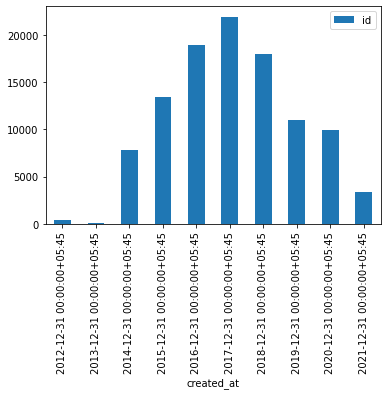

In [8]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

In [13]:
def keywords(urls):
    try:
        first_url = ast.literal_eval(urls)[0]
        article = Article(first_url)
        article.download()
        article.parse()
        article.nlp()
        return article.keywords
    except Exception as e:
        print (str(e))
        return []

In [14]:
df['keywords'] = df.urls.parallel_apply(keywords)

Article `download()` failed with 404 Client Error: Not Found for url: https://ekantipur.com/2015/06/29/top-story/new-health-education-policy/407195.html on URL http://www.ekantipur.com/2015/06/29/top-story/new-health-education-policy/407195.html
Article `download()` failed with 404 Client Error: Not Found for url: https://ekantipur.com/2015/06/29/top-story/madhes-alliance-prepare-to-tear-constitution-draft/407194.html on URL http://www.ekantipur.com/2015/06/29/top-story/madhes-alliance-prepare-to-tear-constitution-draft/407194.html
Article `download()` failed with 404 Client Error: Not Found for url: https://ekantipur.com/2015/06/29/top-story/madan-bhandari-memorial-day-leaders-nepal--khanal-remain-absent/407193.html on URL http://www.ekantipur.com/2015/06/29/top-story/madan-bhandari-memorial-day-leaders-nepal--khanal-remain-absent/407193.html
Article `download()` failed with 404 Client Error: Not Found for url: https://ekantipur.com/2015/06/29/sports/ajinkya-rahane-to-lead-india-in-zi

Process ForkPoolWorker-18:
Process ForkPoolWorker-16:
Process ForkPoolWorker-15:
Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-12:
Process ForkPoolWorker-14:
Process ForkPoolWorker-17:
Traceback (most recent call last):
  File "/Users/ayush/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/ayush/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ayush/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ayush/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Use

KeyboardInterrupt: 